<a href="https://colab.research.google.com/github/PurnamaRidzkyN/Total-net-salles-predictionlearn-ML-/blob/main/predict_House_Prices_Advanced_Regression_Techniq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

house_prices_advanced_regression_techniques_path = kagglehub.competition_download('house-prices-advanced-regression-techniques')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = "/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
df = pd.read_csv(data)
dfid = df['Id']
df = df.drop(['Id'],axis =1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
# Hitung jumlah total baris dalam DataFrame
total_rows = df.shape[0]

# Tentukan ambang batas untuk jumlah nilai non-NA yang harus ada dalam suatu kolom
thresh = total_rows / 2  # Setengah dari jumlah total baris

# Drop kolom-kolom dengan jumlah nilai non-NA kurang dari ambang batas
df = df.dropna(thresh=thresh, axis=1)

In [ ]:
df_objects = df.select_dtypes(include=['object'])
object_feature = df_objects.columns
df_non_objects = df.select_dtypes(exclude=['object'])
non_object_feature = df_non_objects.columns

In [ ]:
missing = df_non_objects.isnull().sum()
missing

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class GarageImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X_copy = X.copy()
        X_copy['GarageYrBlt'] = imputer.fit_transform(X['GarageYrBlt'].values.reshape(-1, 1))
        return X_copy

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class MasVnrImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="constant", fill_value=0)
        X_copy = X.copy()
        X_copy['MasVnrArea'] = imputer.fit_transform(X['MasVnrArea'].values.reshape(-1, 1))
        return X_copy

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class LotFrontageImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="constant", fill_value=0)
        X_copy = X.copy()
        X_copy['LotFrontage'] = imputer.fit_transform(X['LotFrontage'].values.reshape(-1, 1))
        return X_copy

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("GarageIimputer", GarageImputer()),
                    ("MasVnrImputer",MasVnrImputer()),
                    ("LotFrontageImputer",LotFrontageImputer())])
df_non_objects = pipeline.fit_transform(df_non_objects)


In [ ]:
df_objects=df_objects.fillna(value='Missing')

missing = df_objects.isnull().sum()
missing

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
# Ambil hanya fitur-fitur numerik dan korelasinya dengan 'SalePrice'
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
correlation = correlation_matrix['SalePrice']



# Filter fitur-fitur yang memiliki korelasi di dalam kisaran tersebut
selected_features = correlation[correlation.abs() >= 0.6].index.tolist()

# Buat DataFrame baru hanya dengan fitur-fitur yang dipilih
df_selected = df[selected_features]
df_pca = df_non_objects.drop(selected_features,axis =1)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Inisialisasi StandardScaler dan fit-transform data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

# Inisialisasi PCA dengan n_components=2 dan fit-transform data yang telah di-scale
pca = PCA(n_components=1)
df_pca = pca.fit_transform(scaled_data)
df_pca =pd.DataFrame(df_pca, columns=['PC1'])
df_non_object = pd.concat([df_selected,df_pca],axis=1)

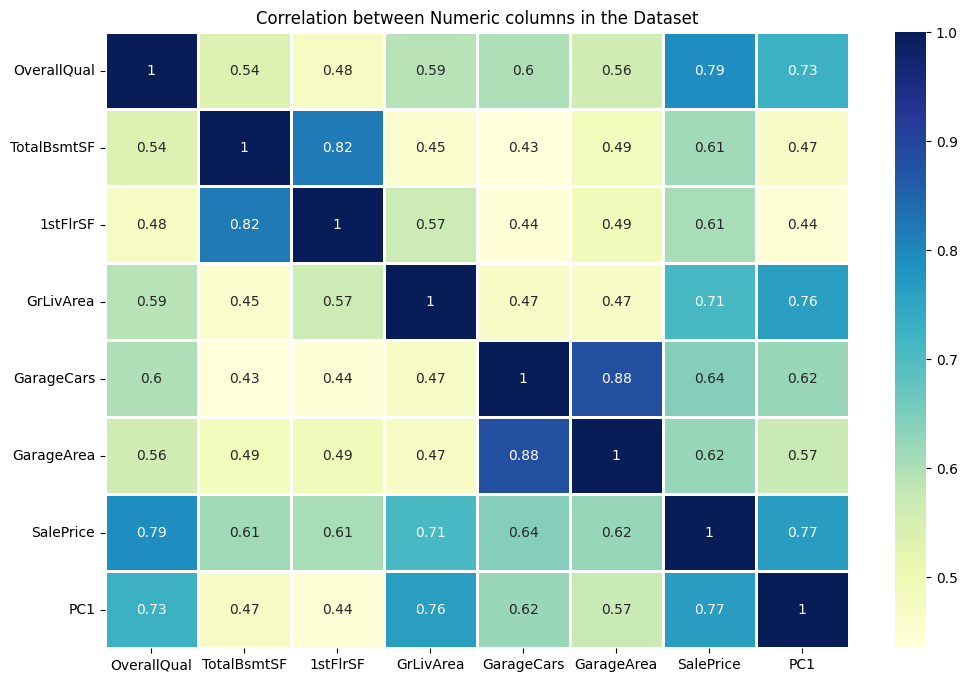

In [ ]:
numeric_columns = df_non_object.select_dtypes(include=['float64','int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, linewidths=1.0)
plt.title("Correlation between Numeric columns in the Dataset")
plt.show()

In [ ]:
df_objects.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
unique_counts = {}

# Menghitung jumlah nilai unik untuk setiap kolom objek
for column in df_objects.columns:
    unique_values = df_objects[column].nunique()  # Menghitung nilai unik
    unique_counts[column] = unique_values  # Menyimpan jumlah nilai unik dalam dictionary

# Mengurutkan dictionary berdasarkan jumlah nilai unik (dari yang paling sedikit)
sorted_unique_counts = dict(sorted(unique_counts.items(), key=lambda item: item[1]))
sorted_unique_counts

{'Street': 2,
 'Utilities': 2,
 'CentralAir': 2,
 'LandSlope': 3,
 'PavedDrive': 3,
 'LotShape': 4,
 'LandContour': 4,
 'ExterQual': 4,
 'KitchenQual': 4,
 'GarageFinish': 4,
 'MSZoning': 5,
 'LotConfig': 5,
 'BldgType': 5,
 'ExterCond': 5,
 'BsmtQual': 5,
 'BsmtCond': 5,
 'BsmtExposure': 5,
 'HeatingQC': 5,
 'RoofStyle': 6,
 'Foundation': 6,
 'Heating': 6,
 'Electrical': 6,
 'FireplaceQu': 6,
 'GarageQual': 6,
 'GarageCond': 6,
 'SaleCondition': 6,
 'BsmtFinType1': 7,
 'BsmtFinType2': 7,
 'Functional': 7,
 'GarageType': 7,
 'Condition2': 8,
 'HouseStyle': 8,
 'RoofMatl': 8,
 'Condition1': 9,
 'SaleType': 9,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'Neighborhood': 25}

In [ ]:
df_objects['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [ ]:
from sklearn.feature_extraction import FeatureHasher

hasher = FeatureHasher(n_features=1, input_type='string')
hashed_features = hasher.fit_transform(df_objects.values.astype(str))
hashed_df = pd.DataFrame(hashed_features.toarray(), columns=['Feature_1'])
print(hashed_df)


      Feature_1
0          -8.0
1          -6.0
2         -10.0
3         -10.0
4         -12.0
...         ...
1455      -18.0
1456      -10.0
1457       -2.0
1458       -4.0
1459       -4.0

[1460 rows x 1 columns]


In [ ]:
df = pd.concat([df_non_object,hashed_df],axis=1)
df.head()


,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice,PC1,Feature_1
0,7,856,856,1710,2,548,208500,2.105396,-8.0
1,6,1262,1262,1262,2,460,181500,-0.467592,-6.0
2,7,920,920,1786,2,608,223500,2.002146,-10.0
3,7,756,961,1717,3,642,140000,-1.457572,-10.0
4,8,1145,1145,2198,3,836,250000,3.726816,-12.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1460 non-null   int64  
 1   TotalBsmtSF  1460 non-null   int64  
 2   1stFlrSF     1460 non-null   int64  
 3   GrLivArea    1460 non-null   int64  
 4   GarageCars   1460 non-null   int64  
 5   GarageArea   1460 non-null   int64  
 6   SalePrice    1460 non-null   int64  
 7   PC1          1460 non-null   float64
 8   Feature_1    1460 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 102.8 KB


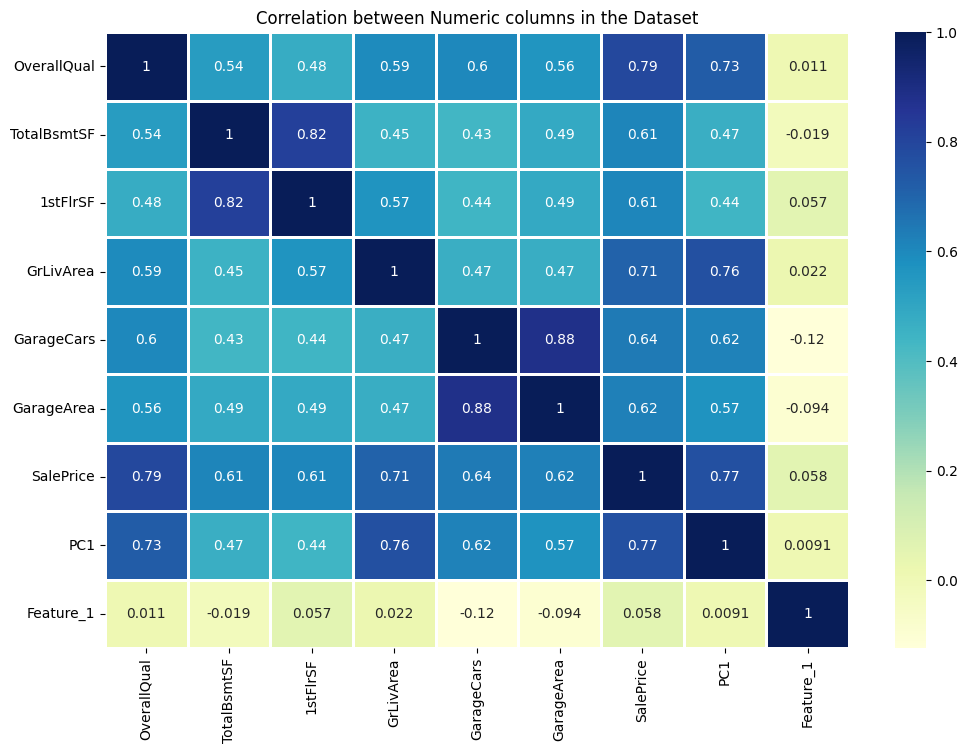

In [ ]:
numeric_columns = df .select_dtypes(include=['float64','int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, linewidths=1.0)
plt.title("Correlation between Numeric columns in the Dataset")
plt.show()

In [ ]:
df.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice,PC1,Feature_1
0,7,856,856,1710,2,548,208500,2.105396,-8.0
1,6,1262,1262,1262,2,460,181500,-0.467592,-6.0
2,7,920,920,1786,2,608,223500,2.002146,-10.0
3,7,756,961,1717,3,642,140000,-1.457572,-10.0
4,8,1145,1145,2198,3,836,250000,3.726816,-12.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


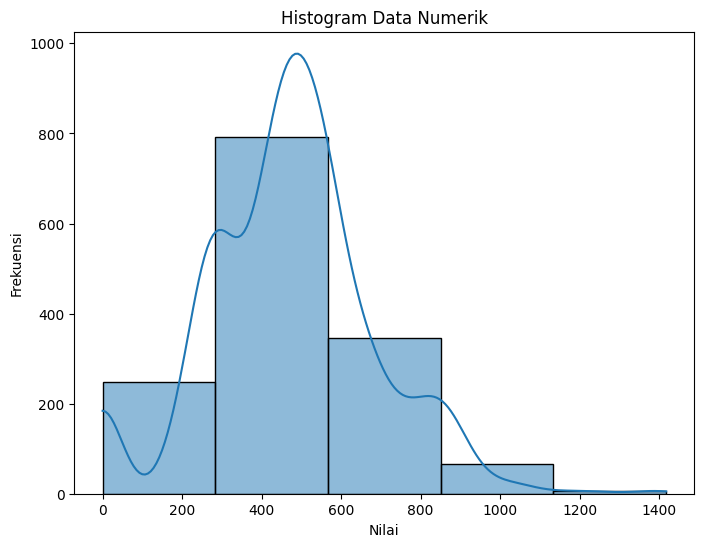

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['GarageArea'], bins=5, kde=True)
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Histogram Data Numerik')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

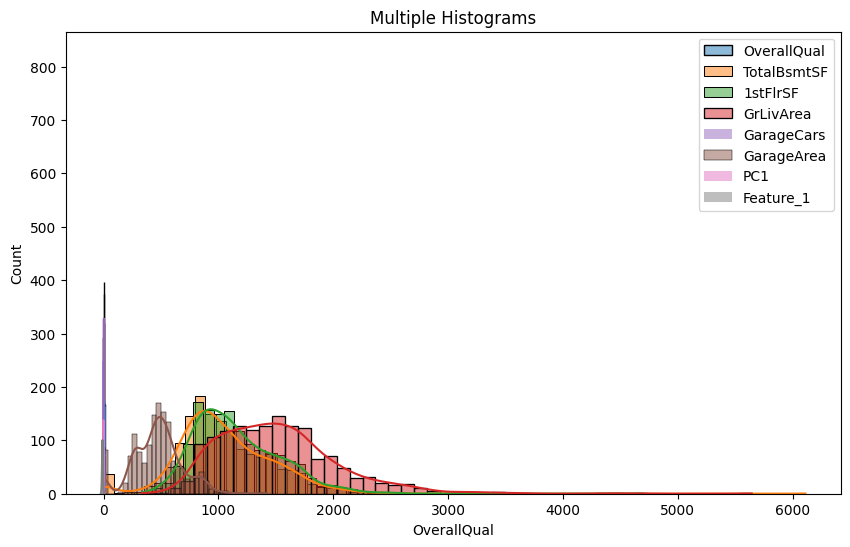

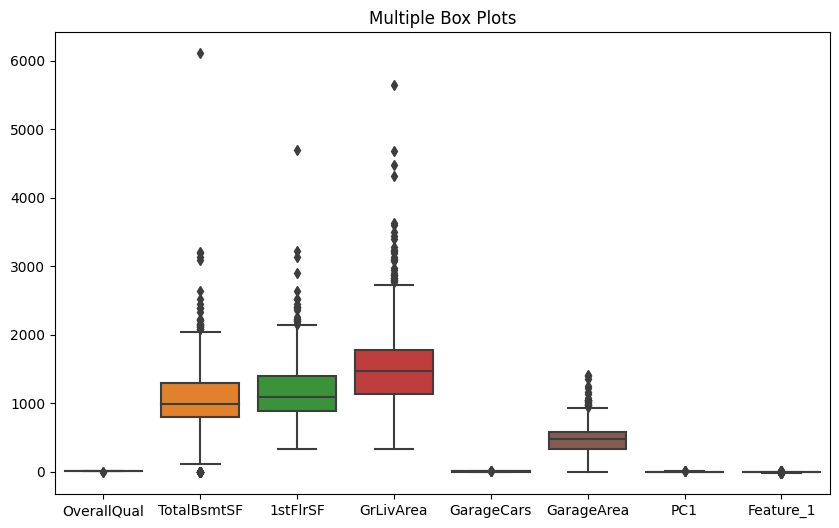

In [ ]:
# Plot multiple histograms
plt.figure(figsize=(10, 6))
dftest = df.select_dtypes(include=['number']).drop(columns='SalePrice')
for col in dftest.columns:
    sns.histplot(dftest[col], kde=True, alpha=0.5, label=col)
plt.legend()
plt.title('Multiple Histograms')
plt.show()

# Plot multiple box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=dftest)
plt.title('Multiple Box Plots')
plt.show()


In [ ]:

from sklearn.preprocessing import StandardScaler
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X[self.attributes])
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed[self.attributes] = self.scaler.transform(X[self.attributes])
        return X_transformed

In [ ]:
# Dapatkan semua kolom kecuali "SalePrice"
feature_columns = df.columns.difference(['SalePrice'])

# Buat pipeline dengan normalisasi hanya pada fitur yang bukan "SalePrice"
custom = Pipeline([
    ('scaler', CustomScaler(attributes=feature_columns))
])

# Contoh penggunaan pipeline
df= custom.fit_transform(df)


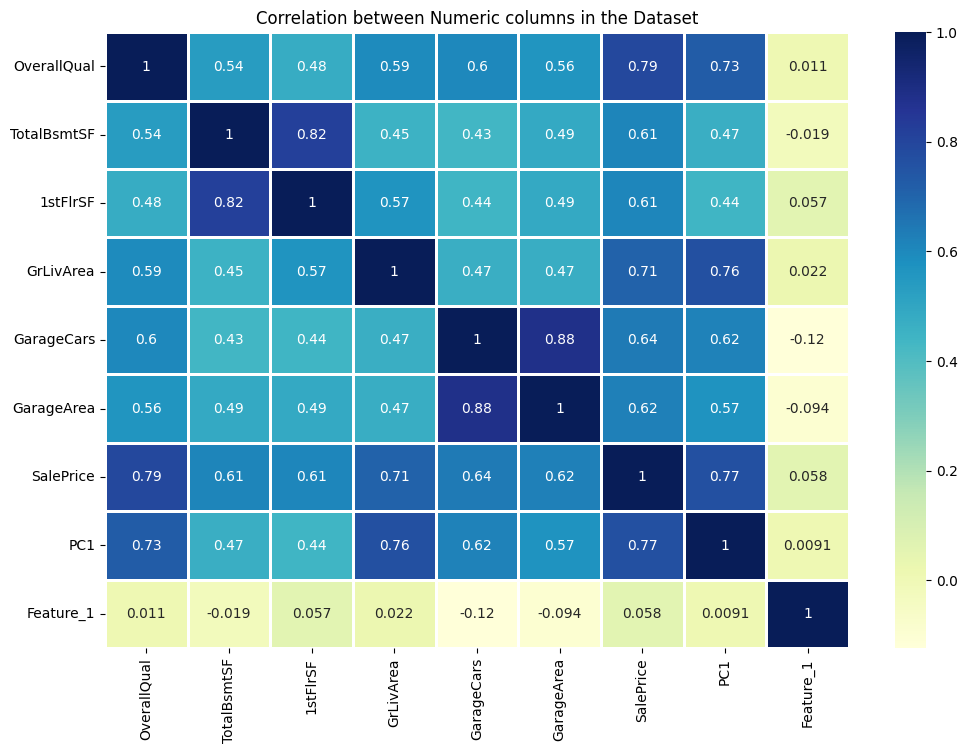

In [ ]:
numeric_columns = df .select_dtypes(include=['float64','int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, linewidths=1.0)
plt.title("Correlation between Numeric columns in the Dataset")
plt.show()

In [ ]:
df = pd.concat([dfid,df],axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X= df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

from sklearn.model_selection import StratifiedKFold, cross_val_score
rf_model = RandomForestClassifier(criterion="gini", n_estimators=500)


# Gunakan Stratified K-Fold dengan k=5
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=stratified_kfold)

# Cetak skor akurasi rata-rata dari cross validation
print("Mean Accuracy using Stratified K-Fold Cross Validation:", cv_scores.mean())



/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mean Accuracy using Stratified K-Fold Cross Validation: 0.01780821917808219


In [ ]:
rf_model.fit(X,y)

RandomForestClassifier(n_estimators=500)

In [ ]:
test = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'
df_test = pd.read_csv(test)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df_test_id = df_test['Id']
df_test = df_test.drop(['Id'],axis=1)

In [ ]:
fitur= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
df_test_non_objects = df_test[fitur]
df_test_non_objects = pipeline.fit_transform(df_test_non_objects )
df_test_non_objects

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [ ]:
selected_features

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [ ]:
fitur_selected= ['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',]
df_test_selected = df_test[fitur_selected]
df_test_pca = df_test_non_objects.drop(fitur_selected,axis =1)
df_test_pca

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,6,1961,1961,0.0,468.0,144.0,270.0,...,1961.000000,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,1958,1958,108.0,923.0,0.0,406.0,...,1958.000000,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,1997,1998,0.0,791.0,0.0,137.0,...,1997.000000,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,1998,1998,20.0,602.0,0.0,324.0,...,1998.000000,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,5,1992,1992,0.0,263.0,0.0,1017.0,...,1992.000000,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,7,1970,1970,0.0,0.0,0.0,546.0,...,1977.721217,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,5,1970,1970,0.0,252.0,0.0,294.0,...,1970.000000,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,7,1960,1996,0.0,1224.0,0.0,0.0,...,1960.000000,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,1992,1992,0.0,337.0,0.0,575.0,...,1977.721217,80,32,0,0,0,0,700,7,2006


In [ ]:
df_test_pca = df_test_pca.fillna(0)
df_test_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   OverallCond    1459 non-null   int64  
 4   YearBuilt      1459 non-null   int64  
 5   YearRemodAdd   1459 non-null   int64  
 6   MasVnrArea     1459 non-null   float64
 7   BsmtFinSF1     1459 non-null   float64
 8   BsmtFinSF2     1459 non-null   float64
 9   BsmtUnfSF      1459 non-null   float64
 10  2ndFlrSF       1459 non-null   int64  
 11  LowQualFinSF   1459 non-null   int64  
 12  BsmtFullBath   1459 non-null   float64
 13  BsmtHalfBath   1459 non-null   float64
 14  FullBath       1459 non-null   int64  
 15  HalfBath       1459 non-null   int64  
 16  BedroomAbvGr   1459 non-null   int64  
 17  KitchenAbvGr   1459 non-null   int64  
 18  TotRmsAb

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Inisialisasi StandardScaler dan fit-transform data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_test_pca)

# Inisialisasi PCA dengan n_components=2 dan fit-transform data yang telah di-scale
pca = PCA(n_components=1)
df_pca = pca.fit_transform(scaled_data)
df_pca =pd.DataFrame(df_pca, columns=['PC1'])
df_test_non_object = pd.concat([df_test_selected,df_pca],axis=1)
df_test_non_object

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,PC1
0,5,882.0,896,896,1.0,730.0,-2.373552
1,6,1329.0,1329,1329,1.0,312.0,0.267057
2,5,928.0,928,1629,2.0,482.0,1.819614
3,6,926.0,926,1604,2.0,470.0,2.026807
4,8,1280.0,1280,1280,2.0,506.0,-0.389673
...,...,...,...,...,...,...,...
1454,4,546.0,546,1092,0.0,0.0,-1.595437
1455,4,546.0,546,1092,1.0,286.0,-1.123705
1456,5,1224.0,1224,1224,2.0,576.0,0.484646
1457,5,912.0,970,970,0.0,0.0,-0.818004


In [ ]:
df_test_objects = df_test[object_feature]
df_test_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1455 non-null   object
 1   Street         1459 non-null   object
 2   LotShape       1459 non-null   object
 3   LandContour    1459 non-null   object
 4   Utilities      1457 non-null   object
 5   LotConfig      1459 non-null   object
 6   LandSlope      1459 non-null   object
 7   Neighborhood   1459 non-null   object
 8   Condition1     1459 non-null   object
 9   Condition2     1459 non-null   object
 10  BldgType       1459 non-null   object
 11  HouseStyle     1459 non-null   object
 12  RoofStyle      1459 non-null   object
 13  RoofMatl       1459 non-null   object
 14  Exterior1st    1458 non-null   object
 15  Exterior2nd    1458 non-null   object
 16  ExterQual      1459 non-null   object
 17  ExterCond      1459 non-null   object
 18  Foundation     1459 non-null

In [ ]:
df_test_objects =df_test_objects.fillna(value='Missing')
df_test_objects

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,Missing,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Missing,Missing,Missing,Missing,Missing,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Missing,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Missing,Missing,Missing,Missing,Missing,Y,WD,Normal


In [ ]:
df_test_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Street         1459 non-null   object
 2   LotShape       1459 non-null   object
 3   LandContour    1459 non-null   object
 4   Utilities      1459 non-null   object
 5   LotConfig      1459 non-null   object
 6   LandSlope      1459 non-null   object
 7   Neighborhood   1459 non-null   object
 8   Condition1     1459 non-null   object
 9   Condition2     1459 non-null   object
 10  BldgType       1459 non-null   object
 11  HouseStyle     1459 non-null   object
 12  RoofStyle      1459 non-null   object
 13  RoofMatl       1459 non-null   object
 14  Exterior1st    1459 non-null   object
 15  Exterior2nd    1459 non-null   object
 16  ExterQual      1459 non-null   object
 17  ExterCond      1459 non-null   object
 18  Foundation     1459 non-null

In [ ]:
from sklearn.feature_extraction import FeatureHasher

hasher = FeatureHasher(n_features=1, input_type='string')
hashed_features = hasher.fit_transform(df_test_objects.values.astype(str))
hashed_df = pd.DataFrame(hashed_features.toarray(), columns=['Feature_1'])
df_test_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Street         1459 non-null   object
 2   LotShape       1459 non-null   object
 3   LandContour    1459 non-null   object
 4   Utilities      1459 non-null   object
 5   LotConfig      1459 non-null   object
 6   LandSlope      1459 non-null   object
 7   Neighborhood   1459 non-null   object
 8   Condition1     1459 non-null   object
 9   Condition2     1459 non-null   object
 10  BldgType       1459 non-null   object
 11  HouseStyle     1459 non-null   object
 12  RoofStyle      1459 non-null   object
 13  RoofMatl       1459 non-null   object
 14  Exterior1st    1459 non-null   object
 15  Exterior2nd    1459 non-null   object
 16  ExterQual      1459 non-null   object
 17  ExterCond      1459 non-null   object
 18  Foundation     1459 non-null

In [ ]:
hashed_df

,Feature_1
0,-14.0
1,-18.0
2,-18.0
3,-16.0
4,-2.0
...,...
1454,-6.0
1455,-14.0
1456,-14.0
1457,-6.0


In [ ]:
df_test = pd.concat([df_test_non_object, hashed_df], axis=1)
df_test

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,PC1,Feature_1
0,5,882.0,896,896,1.0,730.0,-2.373552,-14.0
1,6,1329.0,1329,1329,1.0,312.0,0.267057,-18.0
2,5,928.0,928,1629,2.0,482.0,1.819614,-18.0
3,6,926.0,926,1604,2.0,470.0,2.026807,-16.0
4,8,1280.0,1280,1280,2.0,506.0,-0.389673,-2.0
...,...,...,...,...,...,...,...,...
1454,4,546.0,546,1092,0.0,0.0,-1.595437,-6.0
1455,4,546.0,546,1092,1.0,286.0,-1.123705,-14.0
1456,5,1224.0,1224,1224,2.0,576.0,0.484646,-14.0
1457,5,912.0,970,970,0.0,0.0,-0.818004,-6.0


In [ ]:
df_test = custom.fit_transform(df_test)

In [ ]:
df_test['Feature_1'].unique

<bound method Series.unique of 0      -0.967949
1      -1.899504
2      -1.899504
3      -1.433726
4       1.826716
          ...   
1454    0.895161
1455   -0.967949
1456   -0.967949
1457    0.895161
1458   -0.036394
Name: Feature_1, Length: 1459, dtype: float64>

In [ ]:
df_test = pd.concat([df_test_id, df_test], axis=1)
df_test

,Id,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,PC1,Feature_1
0,1461,-0.751101,-0.370681,-0.654561,-1.215588,-0.987674,1.185538,-1.151196,-0.967949
1,1462,-0.054877,0.638925,0.433298,-0.323539,-0.987674,-0.740959,0.129525,-1.899504
2,1463,-0.751101,-0.266785,-0.574165,0.294508,0.301519,0.042545,0.882531,-1.899504
3,1464,-0.054877,-0.271302,-0.579190,0.243004,0.301519,-0.012761,0.983021,-1.433726
4,1465,1.337571,0.528252,0.310192,-0.424487,0.301519,0.153157,-0.188995,1.826716
...,...,...,...,...,...,...,...,...,...
1454,2915,-1.447325,-1.129580,-1.533893,-0.811797,-2.276867,-2.178918,-0.773803,0.895161
1455,2916,-1.447325,-1.129580,-1.533893,-0.811797,-0.987674,-0.860788,-0.545008,-0.967949
1456,2917,-0.751101,0.401769,0.169499,-0.539856,0.301519,0.475776,0.235058,-0.967949
1457,2918,-0.751101,-0.302923,-0.468645,-1.063136,-2.276867,-2.178918,-0.396740,0.895161


In [ ]:
df_test=df_test.fillna(0)

In [ ]:
Predict = rf_model.predict(df_test)
Predict

array([120500, 147500, 175000, ..., 185000,  84500, 240000])

In [ ]:
# Buat DataFrame baru untuk hasil prediksi
predictions = pd.DataFrame({
    'Id': df_test['Id'],  # Ambil PassengerId dari data uji
    'SalePrice': Predict  # Masukkan hasil prediksi
})

# Simpan DataFrame ke dalam file CSV
predictions.to_csv('/kaggle/working/predictions.csv', index=False)